

---


# **Projeto Final** | Analise de Dados: Inadimplentes
Notebook **Projeto Python** Ebac

Aluno [Danilo Gomes](https://www.linkedin.com/in/danilo-om-gomes/)


---



## 1\. Descrição do Problema

* Motivação <br>
  Dados de crédito com o intuito de avaliar e entender os motivos de inadiplencia. Coluna Default contém a variável resposta que indica se o cliente está diplincente ou inadiplincente.

## 2\. Exploração de Dados

* A Coluna ***default*** armazena a **variável resposta**, enquanto que as demais informações nos ajudam a entendê-la (**variáveis explicativas**).

* Para *default = 0* representam os cliente **adimplentes** e *default = 1* representam os **inadimplentes**.

* Usaremos essas informações para entender o porquê um cliente se torna **inadimplente** e explicar atravéz de seus outros atributos, como salário, escolaridade e movimentação finaceira.

* Importante ressaultar que as demais informações não devem ser usadas como explicação *para este caso*, como as variáveis da coluna ***sexo***.

Vamos realizar a exploração de dados atravéz deste [link](https://raw.githubusercontent.com/DaniloGomezzz/Projeto_Final_Python/main/support_material.csv). Os dados estão no formato CSV e foi armazenada no meu ***GitHub*** na pasta deste projeto.

Iniciaremos lendo os dados em um *Data Frame* da biblioteca python *pandas* :

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/DaniloGomezzz/Projeto_Final_Python/main/support_material.csv', na_values = 'na')

* Temos a seguir uma tabela que descreve um pouco sobre todas as colundas da *Base de Dados*.

In [3]:
df.head(n = 10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


### **2.1. Estrutura**

In [4]:
df.shape #retorna uma tupla com o número de linhas

(10127, 16)

Agora, com a mesma linha de código, vamos analisar a quantidade de linhas entre os clientes *adimplentes* e *inadimplentes* :

In [5]:
print('Adimplentes:', df[df['default'] == 0].shape)

print('Inadimplentes:', df[df['default'] == 1].shape)

Adimplentes: (8500, 16)
Inadimplentes: (1627, 16)


Vamos, então, armazenar essas informações em variáveis descrevendo suas respectivas quantidades :

In [6]:
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

E suas respectivas proporções :

In [7]:
print(f"A proporcão clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total , 2)}%")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total , 2)}%")

A proporcão clientes adimplentes é de 83.93%
A proporcão clientes inadimplentes é de 16.07%


### **2.2. Schema**

Analisaremos agora as Colunas com seus respectivos **tipos de dados**

In [8]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

Aqui já percebemos uma incongruência. As informações das colunas *limite_credito* e *valor_transacoes_12m* são do tipo *object*, ou seja, foram armazenadas como do tipo *string*. Porém, não são valores categóricos, mas sim numéricos.

* Atributos **Categóricos** :



In [9]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


* Atributos **Numéricos** :

In [10]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


### **2.3. Dados faltantes**

Podemos verificar quais colunas possuem dados faltantes.

In [11]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

* A seguinte função nos mostra informações mais precisas sobre os dados faltantes ( dados = *NaN* ):

In [12]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

In [13]:
stats_dados_faltantes(df=df)

print('\n')

stats_dados_faltantes(df=df[df['default'] == 0])

print('\n')

stats_dados_faltantes(df=df[df['default'] == 1])

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


## 3\. Transformação e Limpeza

### **3.1. Correção do Schema**

* Como haviamos notado anteriormente, os dados das colunas *limite_credito* e *valor_transacoes_12m* estavam com o ***type*** incongruentes. Foram marcados como do tipo *object*.

* Dessa forma, vamos realizar a correção e **transformá-los** no tipo *int64*, como deveria ser. Assim, poderemos realizar as demais análises de forma correta.

In [14]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

* Antes de realizar a transformação, precisamos realizar algumas alterações.
O dados estão no formato numérico brasileiro. Já que a linguagem Python utiliza o padrão EUA, precisamos fazer a troca de *vírgulas* para *pontos*

* Dessa forma, utilizaremos a função *lambda* com o método *map* para fazer essa limpeza.

  Assim tempos :

In [15]:
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

# Exemplo do funcionamento da função Lambda com valores de teste :

valores_originais = ['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
valores_limpos = list(map(fn, valores_originais))

print(valores_originais)
print(valores_limpos)

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


* É sempre importante realizar testes com dados **fictícios** antes de aplicar na **Base de Dados oficial**, pois caso haja algum erro os dados oficiais não serão afetados.

* Agora, com a função Lambda funcional e correta, podemos aplicar nas colunas de interesse :

In [16]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)

df['limite_credito'] = df['limite_credito'].apply(fn)

* Vamos agora verificar o ***Schema*** novamente e verificar o resultado da correção :

In [17]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

Agora, Estatisticas gerais de cada atributo :

* Atributos **Categóricos** :

In [18]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


* Atributos **Numéricos** :

In [19]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


### **3.2. Remoção NaN (Dados Faltantes)**

A biblioteca *pandas* é ótima para tarefas de Análise de Dados. Por isso, ela é capaz de "entender" o que são dados faltantes. Dessa forma, a remoção dessas linhas se torna fácil.

Temos assim a seguinte função para esta limpeza :

In [20]:
df.dropna(inplace=True)

Vamos verificar novamente a estrutura da nossa **Base de Dados** :

In [21]:
print(f'Tamanho total após a remoção de dados NaN: {df.shape}')

print('Número de Adimplentes após a remoção de dados NaN:', df[df['default'] == 0].shape)

print('Número de Inadimplentes após a remoção de dados NaN:', df[df['default'] == 1].shape)

Tamanho total após a remoção de dados NaN: (7081, 16)
Número de Adimplentes após a remoção de dados NaN: (5968, 16)
Número de Inadimplentes após a remoção de dados NaN: (1113, 16)


* Tudo feito, dados NaN (Nulos) foram removidos com sucesso. Porém, antes de prosseguirmos é necessário verificar se esta recomção causou impactos na proporção geral dos dados.

* A Análise de Dados por ter um resultado precipitado caso as proporções estejam desbalanceadas, favorecendo algum aspecto. Dessa forma, iremos verificar a proporção novamente :

In [22]:
nova_qtd_total, _ = df.shape
nova_qtd_adimplentes, _ = df[df['default'] == 0].shape
nova_qtd_inadimplentes, _ = df[df['default'] == 1].shape

In [23]:
print(f'A proporcão adimplentes ativos é de {round(100 * qtd_adimplentes / qtd_total, 2)}%')
print(f'A nova proporcão de clientes adimplentes é de {round(100 * nova_qtd_adimplentes / nova_qtd_total, 2)}%')

print('\n')

print(f'A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%')
print(f'A nova proporcão de clientes inadimplentes é de {round(100 * nova_qtd_inadimplentes / nova_qtd_total, 2)}%')

A proporcão adimplentes ativos é de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%


A proporcão clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


* Como podemos ver, as proporções se mantiveram. Então é seguro prosseguir daqui.

* Dados transformados e limpos, podemos partir para próxima etapa e visualizar os dados finais e formar ***Insights***

## 4\. Visualização de dados

A começar pela importação de bibliotecas. Deixei para importá-las aqui pela organização dos tópicos.

Matplot e Seaborn são ótimas bibliotecas para geração de visualizações e gráficos. São referência pela sua gama de possibilidades.

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

Iremos guardar novamente nossas variáveis resposta para poder usá-las mais facilmente :

In [25]:
df_adimplente = df[df['default'] == 0]

df_inadimplente = df[df['default'] == 1]

### **4.1. Visualizações Categóricas**

In [26]:
df.select_dtypes('object').head(n = 10)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue
8,M,sem educacao formal,solteiro,$60K - $80K,blue
9,M,mestrado,solteiro,$80K - $120K,blue
12,M,graduacao,solteiro,$80K - $120K,blue
14,F,mestrado,casado,menos que $40K,blue
16,M,doutorado,solteiro,$80K - $120K,blue


Aqui iremos relacionar cada ***variável resposta*** às ***variáveis categóricas*** da nossa coluna ***default*** e tentar explicar o que torna um clinete **inadimplente**.

#### **4.1.1 Escolaridade x Default**

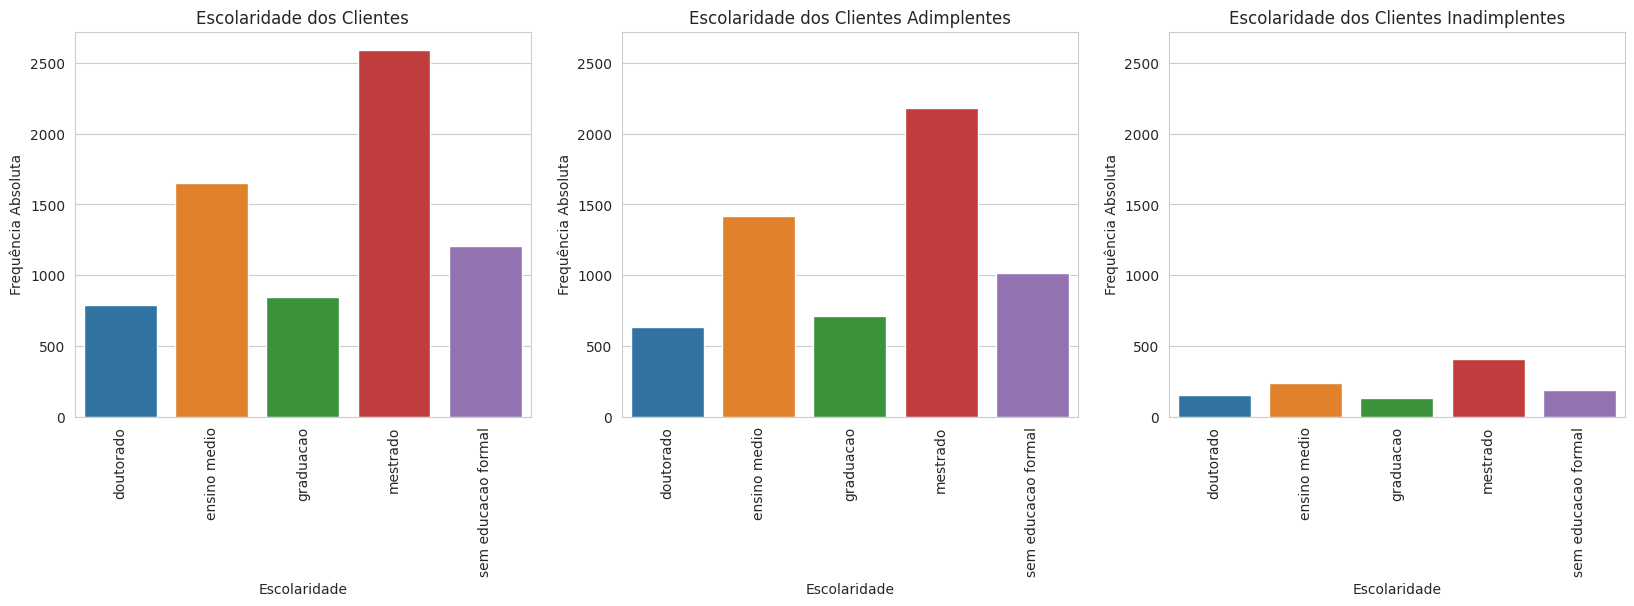

In [27]:
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
max_y = 0

for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
  df_to_plot = dataframe[coluna].value_counts().reset_index()
  df_to_plot.columns = [coluna, 'frequencia_absoluta']
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(data=df_to_plot, x=coluna, y='frequencia_absoluta', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y

for eixo in eixos:
  eixo.set(ylim=(0, max_y))

plt.show()

***Insight***

A proporção entre os três gráficos são semelhantes, podemos ver que há uma grande quantidade de clientes com **Escolaridade** em Mestrado e os mesmos são os que mais se tornam **Inadimplentes**

Podemos notar uma diferença nas colunas **Doutorado** e **Graduação**. No gráfico de clientes **Inadimplentes**, entre essas duas variáveis explicativas, **Douturado** possuim número maior de indivíduos que em **Graduação**. Já no gráfico de **Adimplentes** acontece o contrário.

#### **4.1.2 Salário Anual x Default**

Na coluna "**Salário Anual**" apesar de apresentar valores numéricos, neste caso será levado em consideração com uma informação categórica. É apresentado como um *intervalo* de um valor x a um valor y.

Como podemos ver na seguinte representação :

In [28]:
df.salario_anual.head(n = 10)

0        $60K - $80K
1     menos que $40K
2       $80K - $120K
4        $60K - $80K
5        $40K - $60K
8        $60K - $80K
9       $80K - $120K
12      $80K - $120K
14    menos que $40K
16      $80K - $120K
Name: salario_anual, dtype: object

Então, vamos à representação **Salário Anual** x **Default** :

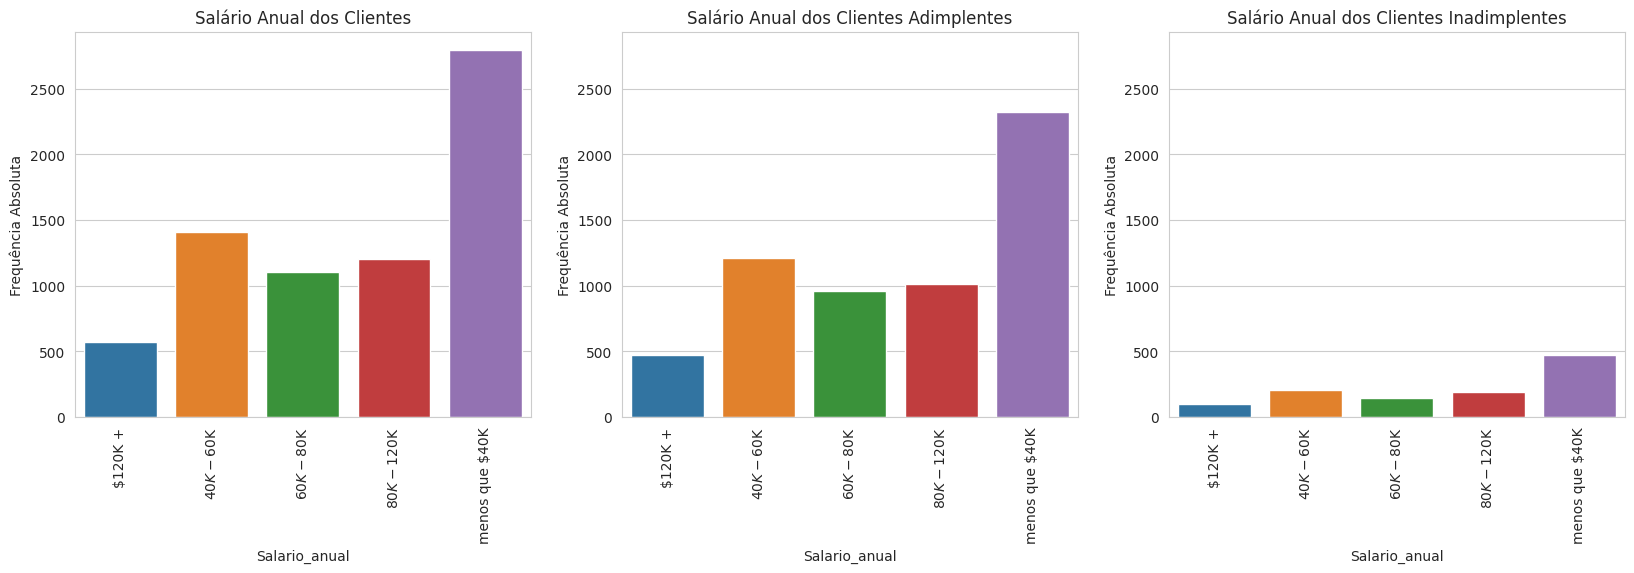

In [29]:
coluna = 'salario_anual'
titulos = ['Salário Anual dos Clientes', 'Salário Anual dos Clientes Adimplentes', 'Salário Anual dos Clientes Inadimplentes']

figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
max_y = 0

for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
  df_to_plot = dataframe[coluna].value_counts().reset_index()
  df_to_plot.columns = [coluna, 'frequencia_absoluta']
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(data=df_to_plot, x=coluna, y='frequencia_absoluta', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y

for eixo in eixos:
  eixo.set(ylim=(0, max_y))

plt.show()

***Insight***

Os três gráficos estão completamente semelhantes en proporção. Também podemos notar que há mais clientes **Inadimplentes** com **Salário anual** **menor que 40k** e **40k -- 60k** que os demais clientes com salários maiores.

#### **4.1.3 Tipo do Cartão x Default**

* Achei pertinente a comparação entre o **tipo do cartão** dos cliente com a coluna de **adimplentes** e **inadimplentes**. Visto que o tipo tem uma influência grande em relação ao gasto total :

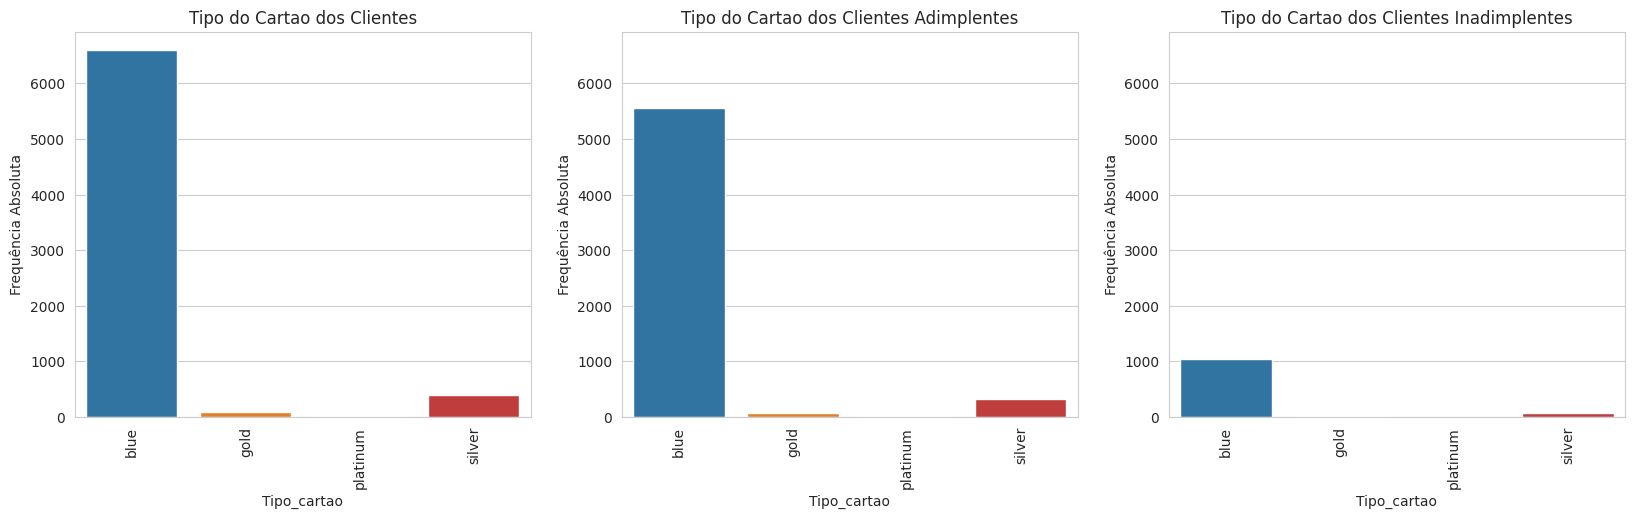

In [30]:
coluna = 'tipo_cartao'
titulos = ['Tipo do Cartao dos Clientes', 'Tipo do Cartao dos Clientes Adimplentes', 'Tipo do Cartao dos Clientes Inadimplentes']

figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
max_y = 0

for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
  df_to_plot = dataframe[coluna].value_counts().reset_index()
  df_to_plot.columns = [coluna, 'frequencia_absoluta']
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(data=df_to_plot, x=coluna, y='frequencia_absoluta', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y

for eixo in eixos:
  eixo.set(ylim=(0, max_y))

plt.show()

***Insight***

Assim como na visualização anterior, os gráficos mantém a proporção entre **Adimplentes** e **Inadimplentes**. Possuindo maior volume entre os clientes com cartão do **Tipo Blue**.

### **4.2. Visualizações Numéricas**

In [31]:
df.select_dtypes('number').head(n = 10)

,id,default,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,3,39,5,3,1,12691.51,1144.90,42
1,818770008,0,49,5,44,6,2,1,8256.96,1291.45,33
2,713982108,0,51,3,36,4,0,1,3418.56,1887.72,20
4,709106358,0,40,3,21,5,0,1,4716.22,816.08,28
5,713061558,0,44,2,36,3,2,1,4010.69,1088.07,24
8,710930508,0,37,3,36,5,0,2,22352.50,1350.14,24
9,719661558,0,48,2,36,6,3,3,11656.41,1441.73,32
12,710599683,0,56,1,36,3,0,6,11751.09,1539.95,17
14,712396908,0,57,2,48,5,2,2,2436.00,1570.23,29
16,709967358,0,48,4,36,6,3,2,30367.57,1671.12,27


Aqui iremos relacionar cada ***variável resposta*** às ***variáveis numéricas*** da nossa coluna ***default*** e tentar explicar o que torna um clinete **inadimplente**.

#### **4.2.1 Qtd de Transações nos Últimos 12 Meses x Default**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


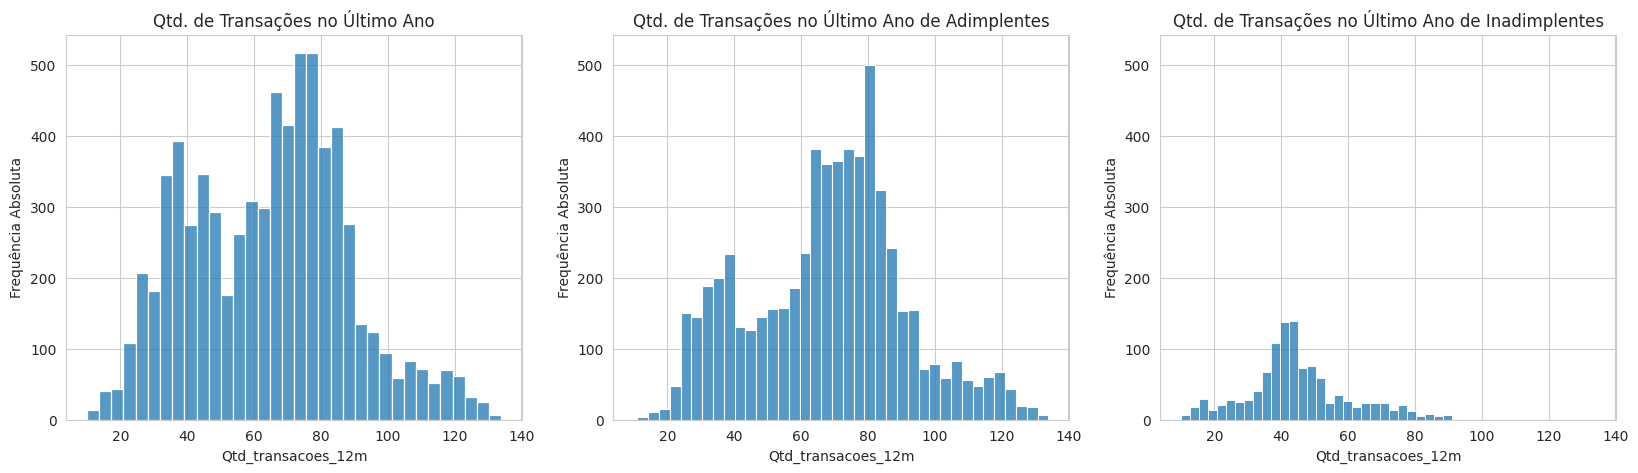

In [32]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

***Insight***

Aqui temos um caso interessante. A quantidade de clientes **Inadimplentes** é maior entre os clientes que realizam as menores quantidades de transações. Como podemos ver, há maior volume na faixa de 35 e 50 transações.

#### **4.2.2 Valor das Transações nos Últimos 12 Meses x Default**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


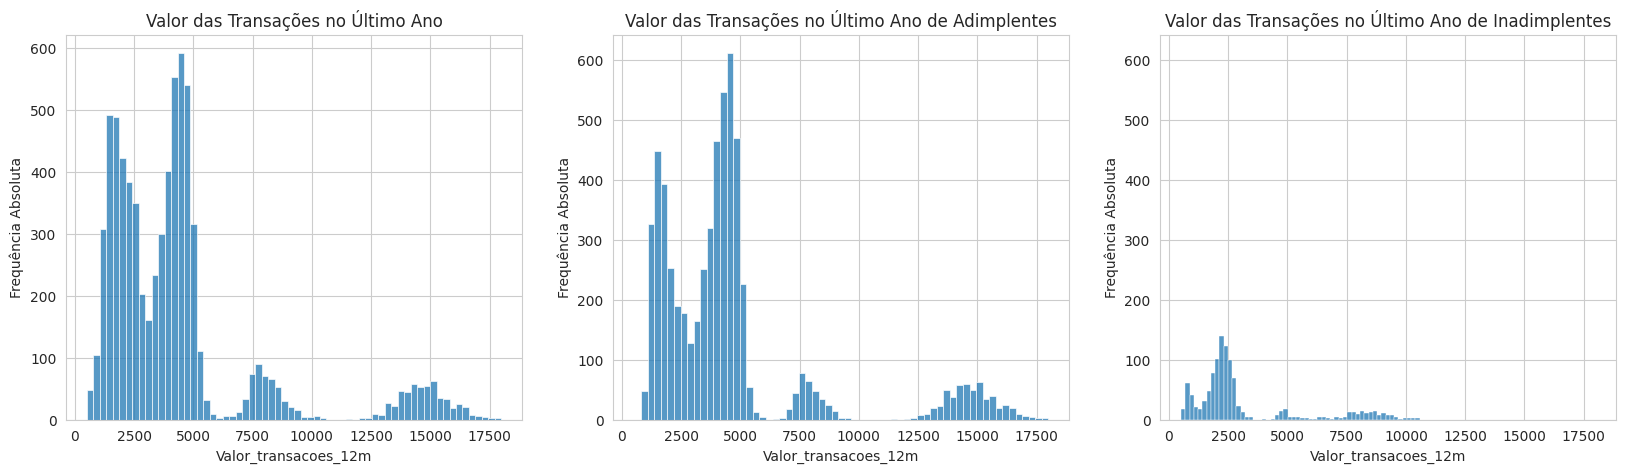

In [33]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

***Insight***

Assim como na visualização anterios, podemos ver que quanto menor o valor das transações, maior a chance de um cliente se tornar **Inadimplente**, resultado não esperado e não coerente.

#### **4.2.3 Idade x Default**

* A idade pode tanto ser considerada uma variáveil do tipo **categórica** ou **numérica**, dependendo de como ela será classificada nos esfeitos de análise.

* Como em todos os casos estamos realizando uma avaliação com a **quantidade total de uma variável** x **valores Default**, não seria diferente neste caso. Já que não vamos efetuar cálculos com as idades, temos :

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


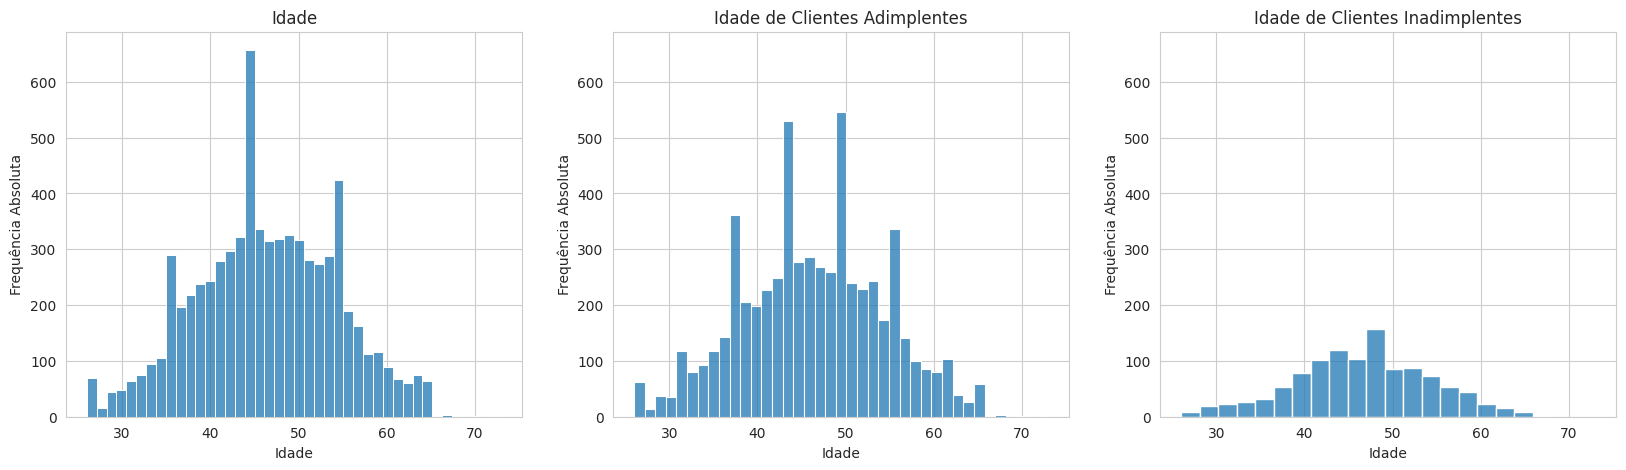

In [34]:
coluna = 'idade'
titulos = ['Idade', 'Idade de Clientes Adimplentes', 'Idade de Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

***Insight***

Neste caso não há uma correlação muito próxiam entre os três gráficos, pois cada um apresenta como resultado um formato não parecido entre os outros.

Porém, podemos inferir que é mais provável termos um cliente **Inadimplente** na faixa de **40 anos** e **50 anos** de idade.

#### **4.2.4 Limite de Crédito x Default**

* A quantidade disponível de crédito para cada cliente também é um fator muito importante para definir quais são mais possíveis de se tornarem **inadimplentes**. Por isso também iremos realizar uma comparação com os valores desta coluna.

* Visto que quanto maior o **Limite de Crédito** mais deste crédito pode ser gasto, vamos analisar se há alguma relação entre estas duas variáveis :

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


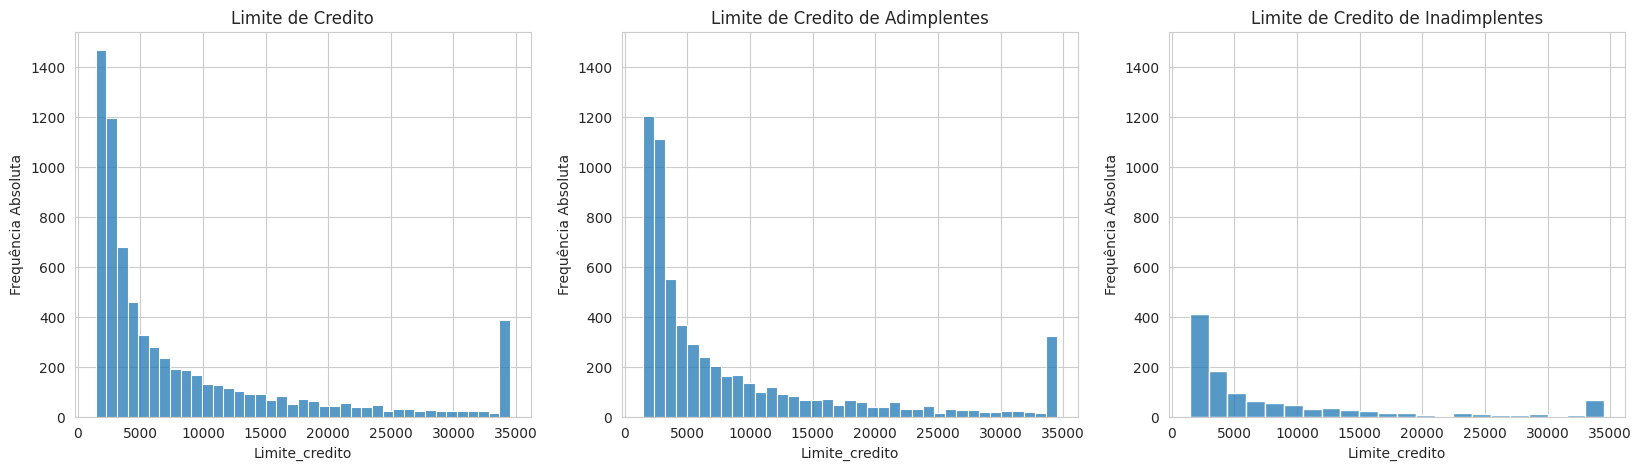

In [35]:
coluna = 'limite_credito'
titulos = ['Limite de Credito', 'Limite de Credito de Adimplentes', 'Limite de Credito de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

***Insight***

Podemos notar que nas **variáveis explicativas Numéricas** tivemos um resultado não usual.

Neste caso, quanto menor o **Limite de Credito** maior a chande de um cliente se tornar **Inadimplentes**.

Temos também a excessão de clientes com **Limite de Credito** de 35 mil ser bem volumosa e também estar em destaque entre os clientes **Inadimplentes**.

## 5\. Resumo e Conclusão

A partir de uma Base de Dados sobre **Adimplência** de clientes. Nesta base de dados temos **variáveis explicativas** que buscam demonstrar a coluna **Default**, nesta que há nossa principal informação (**variáveis resposta**).

Na Análise da Estrutura e no *Schema* do *Data Frame* notamos que havia uma quantidade considerável de valores **NaN** (valores nulos ou em branco). Após remoção desses dados faltantes passamos de uma quantidade total de **10127** para **7081**. Foi seguro manter essa limpeza, pois a proporção entre **Adimplentes** e **Inadimplentes** permaneceu semelhante com a do *Data Frame* original.

Além disso, notamos também que haviam duas colunas com valores do tipo incorretos. São elas : limite_credito e valor_transacoes_12m. O Python estava lendo os valores dessas colunas como do tipo *'object'*, ou seja, *string*. O que é incoerente ao que deseja demonstrar. O Python utiliza o padrão numérico estadunidense e por isso foi necessário realizar a substituição de "." para "," e "," para valores em branco. Com essa substituição, o Python foi capaz de reconhecer esses valores e classificá-los no tipo certo : *'float64'*, ou seja, numérico.

Após a limpeza e correção, fizemos a Análise atravéz de gráficos. Após cada gráfico, foi gerado um insight específico para ele, sempre bucando entender o que torna um cliente **Inadimplente**. Além disso, pudemos explicar e entender algumas características de quais clientes têm mais
propensão de se tornarem **Inadimplentes**.

O *Insight* mais surpreso foi na Visualização Numérica. Nela notamos que quanto **menor** a quantidade de transações,**menor** o valor total de transações e **menor** o limite do cartã **maior** a chance de um cliente se tornar **Inadimplente**, o que é **bastante** contraintuitivo. No mais, na Visualização Categórica tivemos resultados mais habituais. Dentre eles, a relação **Escolaridade x Default** nos apresentou um resultado não esperado. Notamos que os clientes com mais volume em **Inadimplência** possuem Mestrado.

Por fim, foi possível atingir o objetivo principal na Análise Exploratória de Dados. Conseguimos entender os principais motivos que levam um cliente tornar-se **Inadimplente** e agora, após uma pequena análise preditiva, podemos tomar decisões e criar prevenções.